In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [2]:
ng_songs_data = pd.read_csv('nigerian-songs.csv')
ng_songs_data.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [5]:
ng_songs_data.info

<bound method DataFrame.info of                          name                         album  \
0                      Sparky            Mandy & The Jungle   
1                  shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                       LITT!                         LITT!   
3    Confident / Feeling Cool               Enjoy Your Life   
4                  wanted you                         rare.   
..                        ...                           ...   
525                   Kwaroro                       Kwaroro   
526             Concert Party                   Afro Escape   
527                      Loko                    Applaudise   
528                      Gift                    Applaudise   
529                    Macoma                    Applaudise   

                  artist artist_top_genre  release_date  length  popularity  \
0          Cruel Santino  alternative r&b          2019  144000          48   
1    Odunsi (The Engine)          afropop          20

In [4]:
ng_songs_data.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [16]:
ng_songs_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       name  album  artist  artist_top_genre  release_date  length  popularity  \
1    False  False   False             False         False   False       False   
3    False  False   False             False         False   False       False   
4    False  False   False             False         False   False       False   
5    False  False   False             False         False   False       False   
6    False  False   False             False         False   False       False   
..     ...    ...     ...               ...           ...     ...         ...   
514  False  False   False             False         False   False       False   
515  False  False   False             False         False   False       False   
519  False  False   False             False         False   False       False   
522  False  False   False             False         False   False       False   
525  False  False   False             False    

Text(0.5, 1.0, 'Top genres')

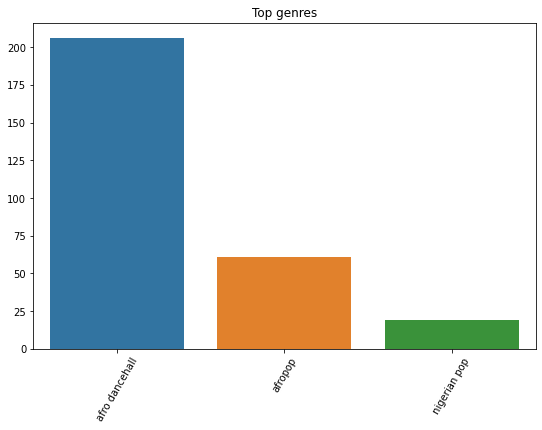

In [6]:
ng_songs_data = ng_songs_data[(ng_songs_data['artist_top_genre'] == 'afro dancehall') | (ng_songs_data['artist_top_genre'] == 'afropop') | (ng_songs_data['artist_top_genre'] == 'nigerian pop')]
ng_songs_data = ng_songs_data[(ng_songs_data['popularity'] > 0)]
top = ng_songs_data['artist_top_genre'].value_counts()
plt.figure(figsize=(9,6))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=60)
plt.title('Top genres',color = 'black')

<AxesSubplot:>

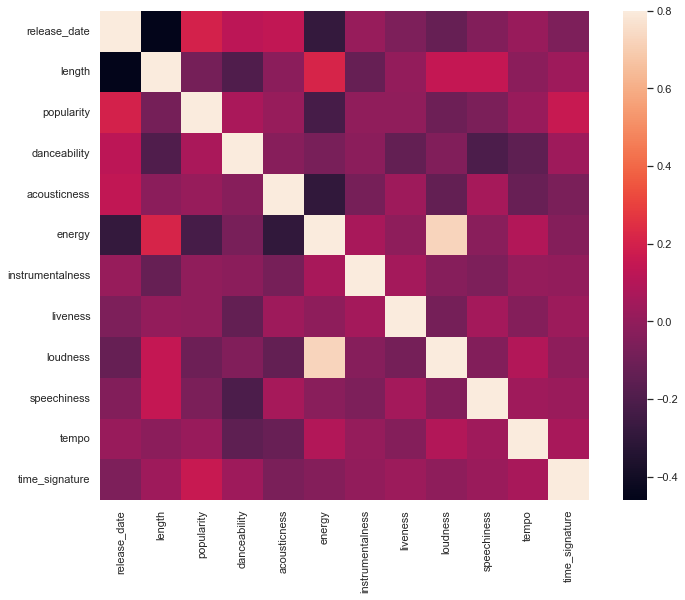

In [12]:
corrmat = ng_songs_data.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8,square=True)

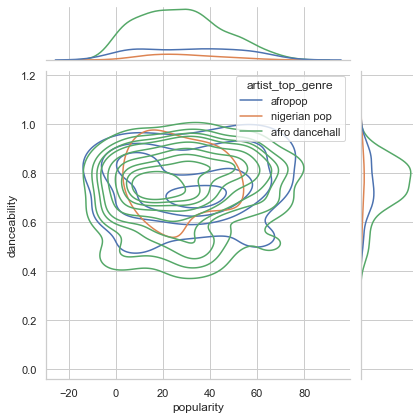

In [11]:
sns.set_style("whitegrid")

g = sns.jointplot(
    data=ng_songs_data,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

plt.show()

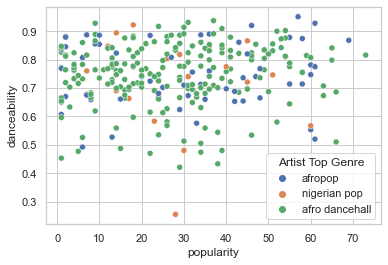

In [14]:
g = sns.scatterplot(data=ng_songs_data, x='popularity', y='danceability', hue='artist_top_genre')
g.legend(title='Artist Top Genre')

plt.show()

In [19]:
!pip install hvplot
import hvplot.pandas
ng_songs_data.hvplot.scatter(x='popularity', y='danceability', by='artist_top_genre', title='hvplot Scatterplot of Dataset')
     

:NdOverlay   [artist_top_genre]
   :Scatter   [popularity]   (danceability)